In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Load dataset
df = pd.read_csv("C:/Users/KIIT/Downloads/cleaned_titanic_data.csv")
print(df.columns)
X=df.drop(columns='Survived',axis=1)
y=df[['Survived']]
print(X)
print(y)
print(df.head())
print(df.shape)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender'], dtype='object')
     Pclass        Age  SibSp  Parch     Fare  Gender
0         3  22.000000      1      0   7.2500       1
1         1  38.000000      1      0  71.2833       0
2         3  26.000000      0      0   7.9250       0
3         1  35.000000      1      0  53.1000       0
4         3  35.000000      0      0   8.0500       1
..      ...        ...    ...    ...      ...     ...
886       2  27.000000      0      0  13.0000       1
887       1  19.000000      0      0  30.0000       0
888       3  29.699118      1      2  23.4500       0
889       1  26.000000      0      0  30.0000       1
890       3  32.000000      0      0   7.7500       1

[891 rows x 6 columns]
     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]
   Survived  Pclass   Age  SibSp  Parch     Far

In [3]:
# Imbalance Data
print(f"No of values of 'Survived' are present: \n{df[['Survived']].value_counts()}")
print(round(len(df[df['Survived']==0])/len(df),2))
print(round(len(df[df['Survived']==1])/len(df),2))

# Simple Random Sampling
n = 15
sample_df = df.sample(n)
print(f"Simple random sampling: \n{sample_df}")

# Systematic Sampling
n = 15
systematic_sample = df.iloc[::n].head(n)
print(f"Systematic sampling: \n {systematic_sample}")

# Startified sampling
min_size = df.groupby('Age').size().min()
stratified_sample = df.groupby('Age', group_keys=False).apply(lambda x: x.sample(n=min_size))
print(f"Stratified sampling: \n{stratified_sample}")

# Cluster sampling
df['Age_cluster'] = pd.qcut(df['Age'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
selected_clusters = np.random.choice(df['Age_cluster'].unique(), size=2, replace=False)
cluster_sample = df[df['Age_cluster'].isin(selected_clusters)]
print(f"Cluster sampling: \n{cluster_sample}")

No of values of 'Survived' are present: 
Survived
0           549
1           342
Name: count, dtype: int64
0.62
0.38
Simple random sampling: 
     Survived  Pclass        Age  SibSp  Parch      Fare  Gender
474         0       3  22.000000      0      0    9.8375       0
135         0       2  23.000000      0      0   15.0458       1
417         1       2  18.000000      0      2   13.0000       0
698         0       1  49.000000      1      1  110.8833       1
282         0       3  16.000000      0      0    9.5000       1
288         1       2  42.000000      0      0   13.0000       1
542         0       3  11.000000      4      2   31.2750       0
564         0       3  29.699118      0      0    8.0500       0
540         1       1  36.000000      0      2   71.0000       0
701         1       1  35.000000      0      0   26.2875       1
30          0       1  40.000000      0      0   27.7208       1
737         1       1  35.000000      0      0  512.3292       1
318         

C:\Users\KIIT\AppData\Local\Temp\ipykernel_4116\3205491171.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df.groupby('Age', group_keys=False).apply(lambda x: x.sample(n=min_size))


1.2964817022797237
Lower boundary for outliers: -2.5363263832349148
Upper boundary for outliers: 2.64960042588398
Number of outliers: 1
Outliers: [3.05812298]


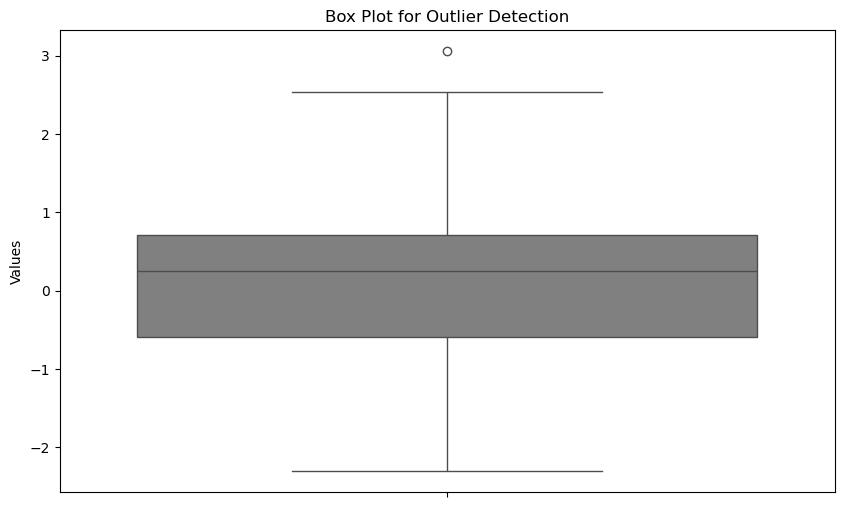

In [4]:
# Interquartile range
df = np.random.normal(loc=0, scale = 1, size =100)
Q1 = np.percentile(df, 25)
Q3 = np.percentile(df, 75)
IQR = Q3 - Q1 
print(IQR)

# Calculate upper and lower boundaries for outliers
lower_boundary = Q1 - 1.5 * IQR
upper_boundary = Q3 + 1.5 * IQR

print("Lower boundary for outliers:", lower_boundary)
print("Upper boundary for outliers:", upper_boundary)

# Find outliers
outliers = df[(df < lower_boundary) | (df > upper_boundary)]
print("Number of outliers:", len(outliers))
print("Outliers:", outliers)

# Create a box plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, color='grey')
plt.title('Box Plot for Outlier Detection')
plt.ylabel('Values')
plt.show()


In [13]:
# Compute correlation matrix for numeric columns if not already defined
if 'correlation_matrix' not in locals():
    correlation_matrix = X.corr()

threshold = 0.5  # Lower the threshold to see more correlated pairs
high_corr_features = np.where(np.abs(correlation_matrix) > threshold)
high_corr_features = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) for x, y in zip(*high_corr_features) if x != y]
for feat1, feat2, corr in high_corr_features:
    print(f"{feat1} - {feat2}: {corr:.2f}")


Pclass - Fare: -0.55
Fare - Pclass: -0.55


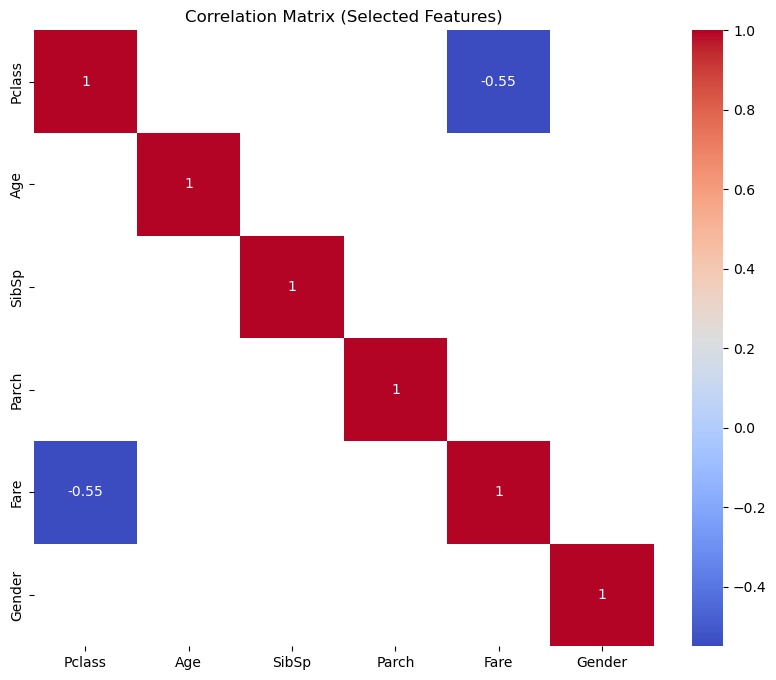

In [ ]:
# Visualize correlation matrix for selected features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[abs(correlation_matrix) > threshold], annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Selected Features)')
plt.show()

In [ ]:
# Calculate confidence interval for mean Fare

# Calculate mean and standard error for Pclass
mean_pclass = np.mean(X['Pclass'])
std_error_pclass = stats.sem(X['Pclass'])

# Calculate sample size, mean, and critical value for Fare
sample_size = len(X['Fare'])
mean_fare = X['Fare'].mean()

# Calculate critical value for 95% confidence level
critical_value = stats.t.ppf(0.975, df=sample_size-1)  # 0.975 because it's two-tailed test
print("\nSample Statistics:")
print(f"Sample Size: {sample_size}")
print(f"Mean Fare: ${mean_fare:.2f}")
print(f"Critical Value: {critical_value:.4f}")


Sample Statistics:
Sample Size: 891
Mean Fare: $32.20
Critical Value: 1.9626


In [6]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

     Pclass        Age  SibSp  Parch      Fare  Gender
445       1   4.000000      0      2   81.8583       1
650       3  29.699118      0      0    7.8958       1
172       3   1.000000      1      1   11.1333       0
450       2  36.000000      1      2   27.7500       1
314       2  43.000000      1      1   26.2500       1
..      ...        ...    ...    ...       ...     ...
106       3  21.000000      0      0    7.6500       0
270       1  29.699118      0      0   31.0000       1
860       3  41.000000      2      0   14.1083       1
435       1  14.000000      1      2  120.0000       0
102       1  21.000000      0      1   77.2875       1

[623 rows x 6 columns]
     Pclass        Age  SibSp  Parch     Fare  Gender
709       3  29.699118      1      1  15.2458       1
439       2  31.000000      0      0  10.5000       1
840       3  20.000000      0      0   7.9250       1
720       2   6.000000      0      1  33.0000       0
39        3  14.000000      1      0  11.2417 

In [ ]:
# Model evaluation
lr=LogisticRegression()
lr.fit(X_train,y_train)

# Model prediction
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

print(f"This is the predicted trained value of y: \n {y_pred_train}")
print(f"This is the predicted test value of y: \n {y_pred_test}")


This is the predicted trained value of y: 
 [1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1
 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1
 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0
 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


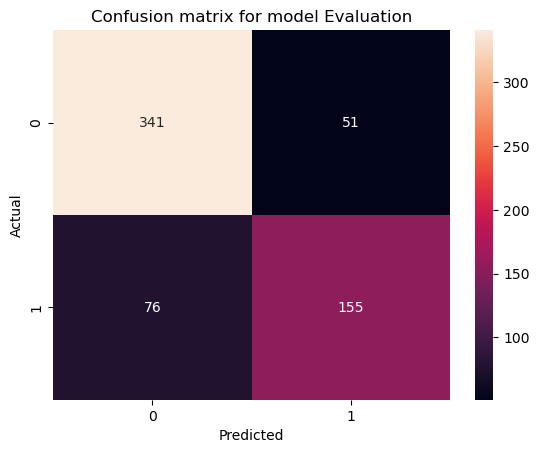

0.7961476725521669
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       392
           1       0.75      0.67      0.71       231

    accuracy                           0.80       623
   macro avg       0.79      0.77      0.78       623
weighted avg       0.79      0.80      0.79       623



In [ ]:
# Model Training

confusion_matrix(y_train,y_pred_train)
sns.heatmap(confusion_matrix(y_train,y_pred_train), annot=True, fmt='.3g')
plt.title('Confusion matrix for model Evaluation')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(accuracy_score(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))

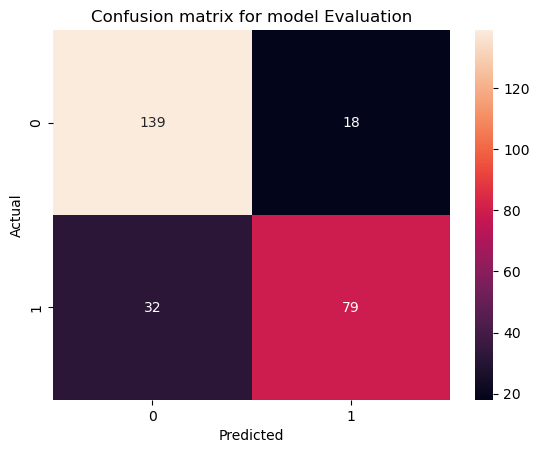

0.8134328358208955
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.81      0.71      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [9]:
# Model Test

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion matrix for model Evaluation')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(accuracy_score(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))